# First, imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from wordcloud import WordCloud

# Second, importing google drive and setting up pandas dataframe.
We first need to convert the .txt into .csv for ease of use in pandas.

In [3]:
# prompt: Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
def count_lines(file_path):
  """Count the total number of lines in the file."""
  with open(file_path, 'r') as f:
    return sum(1 for line in f)

def print_progress(current_line, total_lines):
    percentage = (current_line / total_lines) * 100
    if percentage % 10 == 0:
        clear_output(wait=True)
        print(f"Progress: {percentage:.0f}%")

def convert_file(input_file, output_file):
    sentiments = []
    reviews = []

    total_lines = count_lines(input_file)  # Count total lines in the file

    with open(input_file, 'r') as infile:
        for current_line, line in enumerate(infile, start=1):
            parts = line.strip().split(maxsplit=1)  # Split only at the first space
            if len(parts) == 2:
                label, review = parts
                sentiment = 0 if '__label__1' in label else 1 if '__label__2' in label else None
                # 0 is negative and 1 is positive.
                if sentiment is not None:
                    sentiments.append(sentiment)
                    reviews.append(review)

            # Print progress after processing each line
            print_progress(current_line, total_lines)

    # Create a DataFrame
    df = pd.DataFrame({
        'Sentiment': sentiments,
        'Review': reviews
    })

    # Save the DataFrame to a .csv file
    df.to_csv(output_file, index=False)

    print("Conversion completed using pandas!")

# converting train.
input_file = '/content/drive/MyDrive/Data-sets/AmazonReviews/train.ft.txt'
output_file = '/content/drive/MyDrive/Data-sets/AmazonReviews/train.ft.csv'

convert_file(input_file, output_file)

# converting test
input_file = '/content/drive/MyDrive/Data-sets/AmazonReviews/test.ft.txt'
output_file = '/content/drive/MyDrive/Data-sets/AmazonReviews/test.ft.csv'

convert_file(input_file, output_file)

Progress: 100%
Conversion completed using pandas!


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Data-sets/AmazonReviews/train.ft.csv')
line_count = len(df1)

print(f'Number of lines in the CSV: {line_count}')

Number of lines in the CSV: 3600000


In [19]:
df2 = pd.read_csv('/content/drive/MyDrive/Data-sets/AmazonReviews/test.ft.csv')
line_count = len(df2)

print(f'Number of lines in the CSV: {line_count}')

Number of lines in the CSV: 400000


# Now, we start the EDA (Exploratory Data Analysis).

In [3]:
trainingset = df1
print(trainingset.head(20))
print("================================================")
print("<Showing set info>")
print(trainingset.info())
print("================================================")
print("<Showing null values>")
print(trainingset.isnull().sum())
print("================================================")
print("<Showing set description>")
print(trainingset.describe())

    Sentiment                                             Review
0           1  Stuning even for the non-gamer: This sound tra...
1           1  The best soundtrack ever to anything.: I'm rea...
2           1  Amazing!: This soundtrack is my favorite music...
3           1  Excellent Soundtrack: I truly like this soundt...
4           1  Remember, Pull Your Jaw Off The Floor After He...
5           1  an absolute masterpiece: I am quite sure any o...
6           0  Buyer beware: This is a self-published book, a...
7           1  Glorious story: I loved Whisper of the wicked ...
8           1  A FIVE STAR BOOK: I just finished reading Whis...
9           1  Whispers of the Wicked Saints: This was a easy...
10          0  The Worst!: A complete waste of time. Typograp...
11          1  Great book: This was a great book,I just could...
12          1  Great Read: I thought this book was brilliant,...
13          0  Oh please: I guess you have to be a romance no...
14          0  Awful beyo

## Seeing the sentiment distribution.

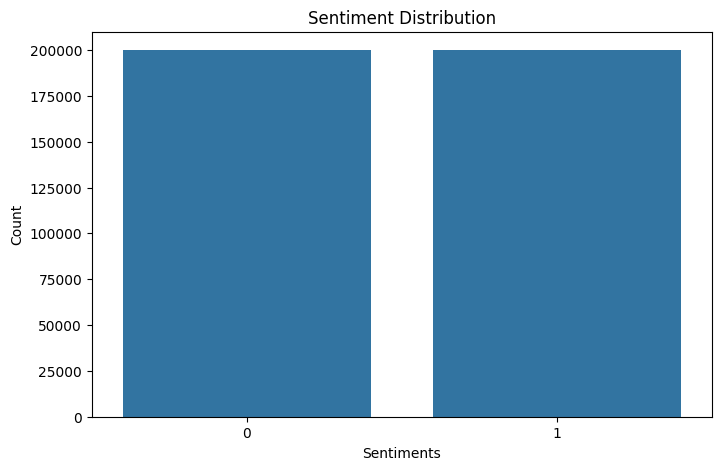

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df)
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## Text Length Analysis

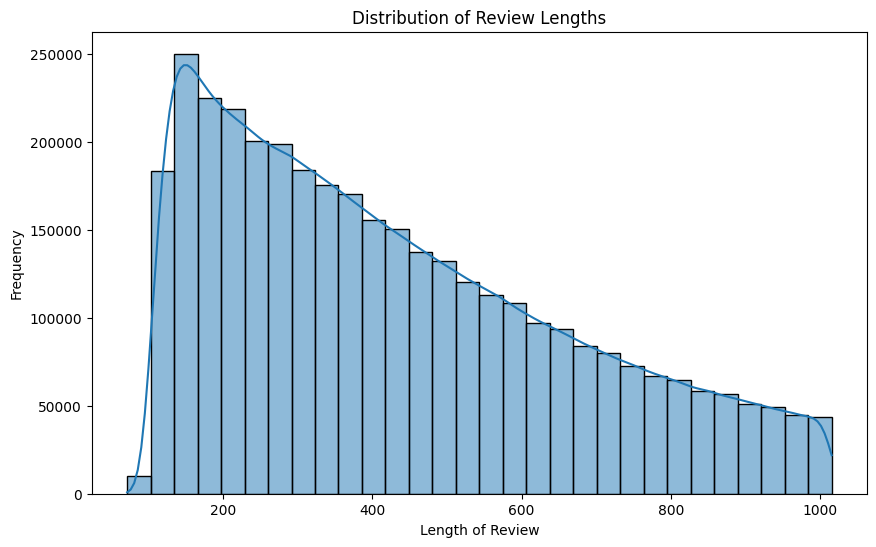

In [32]:
# Calculate the length of each review
trainingset['review_length'] = trainingset['Review'].apply(len)

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(trainingset['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

Generate a word cloud to visualize common words in reviews.

In [5]:
# Combine all reviews into a single string
text = ' '.join(trainingset['Review'])

# Split the text into chunks
n = 100000  # Number of words per chunk
chunks = [text[i:i+n] for i in range(0, len(text), n)]

# Generate word clouds for each chunk
wordclouds = [WordCloud(width=800, height=400, background_color='white').generate(chunk) for chunk in chunks]

# Display the word clouds
for i, wordcloud in enumerate(wordclouds):
  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for Chunk {i+1}')
  plt.show()

KeyboardInterrupt: 